# Exploring the Relationship Between GDP and Life Expectancy in Six Countries

## Overview:
    This project involves:
        1. Using the provided data set on GDP and life expectancy for six countries.
        2. Data cleaning and preperation for analysis.
        3. Statistical analysis and visualization to explore the relationship between GDP and life expectancy.
        4. Preparation of a blog post summarizing findings and insights.

### Hypothesis:
     Life Expectancy is directly related to GDP .

### Objective:

* To analyze data from the World Health Organization to identify the relationship between GDP and Life Expectancy.


### Findings:

### Summary:
    

In [88]:
# import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
# load CSV file for analysis and print head
gdp_le_data = pd.read_csv('~//Documents//Coding//Life-Expectancy-and-GDP-Starter//Life-Expectancy-and-GDP//all_data.csv')
print(gdp_le_data.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [92]:
# Clean data set
## Normalize Column Names
gdp_le_data.columns = (gdp_le_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '', regex=False).str.replace(')', '', regex=False))
                       
## Ensure numeric columns are properly formatted
gdp_le_data['gdp'] = pd.to_numeric(gdp_le_data['gdp'], errors='coerce')
gdp_le_data['life_expectancy_at_birth_years'] = pd.to_numeric(gdp_le_data['life_expectancy_at_birth_years'], errors='coerce')

# Verify Cleaning
print(gdp_le_data.info())
print(gdp_le_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         96 non-null     object 
 1   year                            96 non-null     int64  
 2   life_expectancy_at_birth_years  96 non-null     float64
 3   gdp                             96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
  country  year  life_expectancy_at_birth_years           gdp
0   Chile  2000                            77.3  7.786093e+10
1   Chile  2001                            77.3  7.097992e+10
2   Chile  2002                            77.8  6.973681e+10
3   Chile  2003                            77.9  7.564346e+10
4   Chile  2004                            78.0  9.921039e+10


In [94]:
# Find Summary Statistics
print("The Average Life expectancy across all countries is: " + str(np.mean(gdp_le_data['life_expectancy_at_birth_years'])))
print("The median Life expectancy across all countries is: " + str(np.median(gdp_le_data['life_expectancy_at_birth_years'])))
print("The Max Life Expectancy across all countries is: " + str(np.max(gdp_le_data['life_expectancy_at_birth_years'])))
print("The Minimum Life Expectancy across all countries is: " + str(np.min(gdp_le_data['life_expectancy_at_birth_years'])))
print("The Average GDP across all countries is: " + str(np.mean(gdp_le_data['gdp'])))
print("The median GDP across all countries is: " + str(np.median(gdp_le_data['gdp'])))
print("The Max GDP across all countries is: " + str(np.max(gdp_le_data['gdp'])))
print("The Minimum GDP across all countries is: " + str(np.min(gdp_le_data['gdp'])))


The Average Life expectancy across all countries is: 72.78958333333334
The median Life expectancy across all countries is: 76.75
The Max Life Expectancy across all countries is: 81.0
The Minimum Life Expectancy across all countries is: 44.3
The Average GDP across all countries is: 3880498570768.396
The median GDP across all countries is: 1280220000000.0
The Max GDP across all countries is: 18100000000000.0
The Minimum GDP across all countries is: 4415702800.0


Key Insights:
1. Life Expectancy:
    * Range: 44.3 to 81.0 years
    * Median (50%): 76.75 years
    * Potential Outliers: Values near the minimum (44.3) may require further exploration
2. GDP:
    * Range: Approximately 4.42 billion to 18.1 Trillion (dollars)
    * Median (50%): Approximately $1.28 trillion
    * Potential Outliers: GDP values near the lower or upper extremes should be visualized  

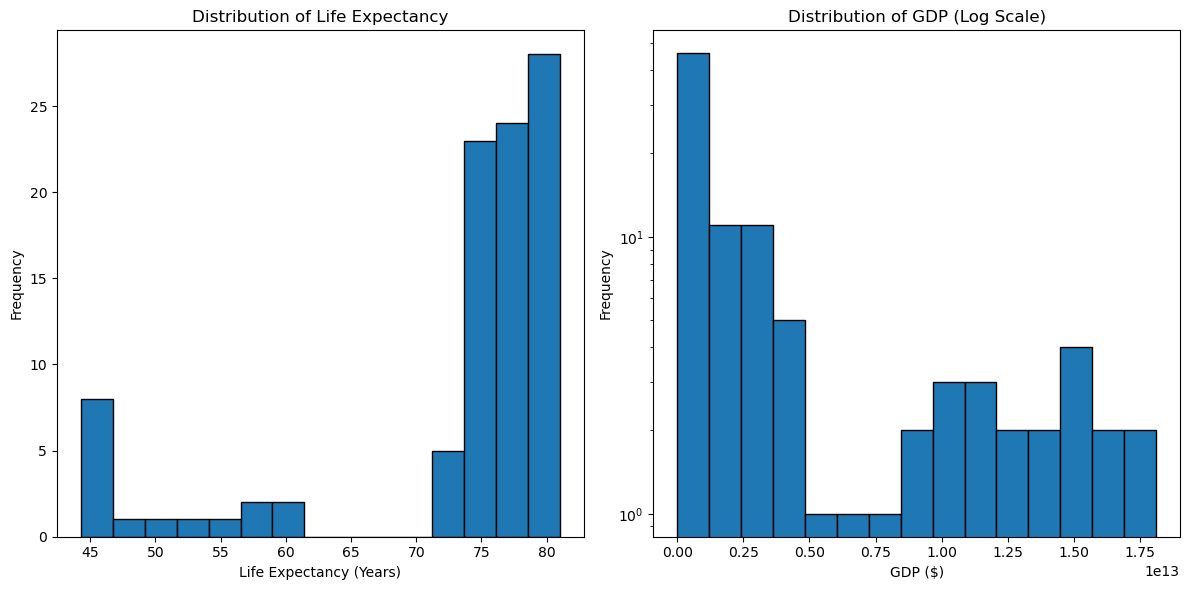

In [97]:
# Beginning Visualization and Analysis

# Plotting histograms to visualize distributions
plt.figure(figsize=(12, 6))

# Life Expectancy Distribution
plt.subplot(1, 2, 1)
plt.hist(gdp_le_data['life_expectancy_at_birth_years'], bins=15, edgecolor='k')
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('Frequency')

# GDP Distribution
plt.subplot(1, 2, 2)
plt.hist(gdp_le_data['gdp'], bins=15, edgecolor='k', log=True) #log scale for better visualization of GDP range
plt.title('Distribution of GDP (Log Scale)')
plt.xlabel('GDP ($)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Additional Insights:
1. Life Expectancy:
    * Most values cluster between 70 and 80 years, with a few lower values near 44 years. This indicates potential outliers or countries with lower life expectancy

2. GDP:
    * The distribution spans a wide range, with significant concentration of values on the loewr end. This justifies using a log scale for better visualization.

### Next Steps:
* Explore life expectancy outliers (countries with values near 44 years).
* Visualize the relationship between GDP and lief expectancy using scatterplots to assess the trend and identify anomalies.

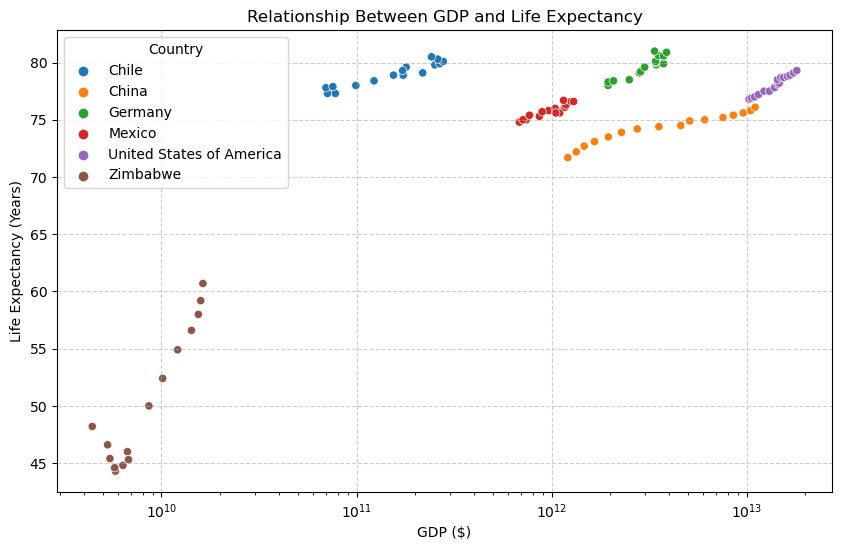

In [100]:
# Scatterplot to visualize the relationship between GDP and life expectancy

plt.figure(figsize=(10, 6))
sns.scatterplot(data=gdp_le_data, x='gdp', y='life_expectancy_at_birth_years', hue='country', palette='tab10')
plt.title('Relationship Between GDP and Life Expectancy')
plt.xlabel('GDP ($)')
plt.ylabel('Life Expectancy (Years)')
plt.xscale('log') # log scale for better visualization
plt.legend(title='Country')
plt.grid(True, linestyle='--', alpha=0.6)

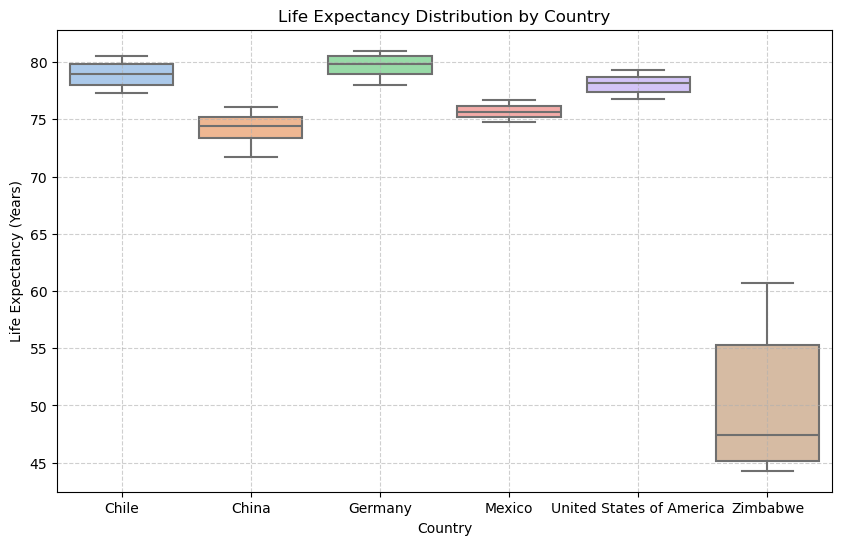

In [101]:
# Boxplot to check for country-specific patterns in life expectancy
plt.figure(figsize=(10, 6))
sns.boxplot(data=gdp_le_data, x='country', y='life_expectancy_at_birth_years', palette='pastel')
plt.title('Life Expectancy Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Life Expectancy (Years)')
plt.grid(True, linestyle='--', alpha=0.6)

### Observations:
1. *Scatterplot* (GDP vs. Life Expectancy):
   * A positive relationship is visible: countries with higher GDP tend to have higher life expectancy.
   * The log scale for GDP highlights a wide range of values across countries.
   * Some countries appear clustered, while others show distinct outliers.


2. *Boxplot* (Life Expectancy by Country):
    * Countries like Chile and Germany have narrower ranges and higher median life expectancy.
    * Countries like Zimbabwe show a much lower median life expectancy and a wider spread, indicating disparities.

### Next Steps:
1. Correlation Analysis:
    * Quantify the strength of the relationship between GDP and life expectancy.
2. Trend Analysis:
    * Explore how life expectancy has evolvd over time in relation to GDP for each country.
3. Outlier Identification:
    * Focus on countries or years with anomalous GDP or life expectancy values.

In [106]:
# Correlation analysis between GDP and Life Expectancy
correlation_matrix = gdp_le_data[['gdp', 'life_expectancy_at_birth_years']].corr()

# Correlation per Country
correlation_per_country = gdp_le_data.groupby('country')[['gdp', 'life_expectancy_at_birth_years']].corr().iloc[0::2, -1]

correlation_matrix, correlation_per_country

(                                     gdp  life_expectancy_at_birth_years
 gdp                             1.000000                        0.343207
 life_expectancy_at_birth_years  0.343207                        1.000000,
 country                      
 Chile                     gdp    0.949877
 China                     gdp    0.908526
 Germany                   gdp    0.932699
 Mexico                    gdp    0.932238
 United States of America  gdp    0.981709
 Zimbabwe                  gdp    0.966200
 Name: life_expectancy_at_birth_years, dtype: float64)

### *Correlation Analysis*:
1. Overall Correlation:
    * The correlation between GDP and life expectancy across all data is 0.34, indicating a weak positive relationship when all countries are combined. This suggests variations at the individual country level may influence the overall trend.
2. Correlation by Country:
    * *Chile*: 0.95 (Strong positive correlation)
    * *China*: 0.91 (Strong positive correlation)
    * *Germany*: 0.93 (Strong positive correlation)
    * *Mexico*: 0.93 (Strong positive correlation)
    * *United States*: 0.98 (Very strong positive correlation)
    * *Zimbabwe*: 0.97 (Very strong positive correlation)
  
* *All countries show a strong to very strong positive correlation between GDP and life expectancy. Zimbabwe and the United States exhibit the strongest correlation*

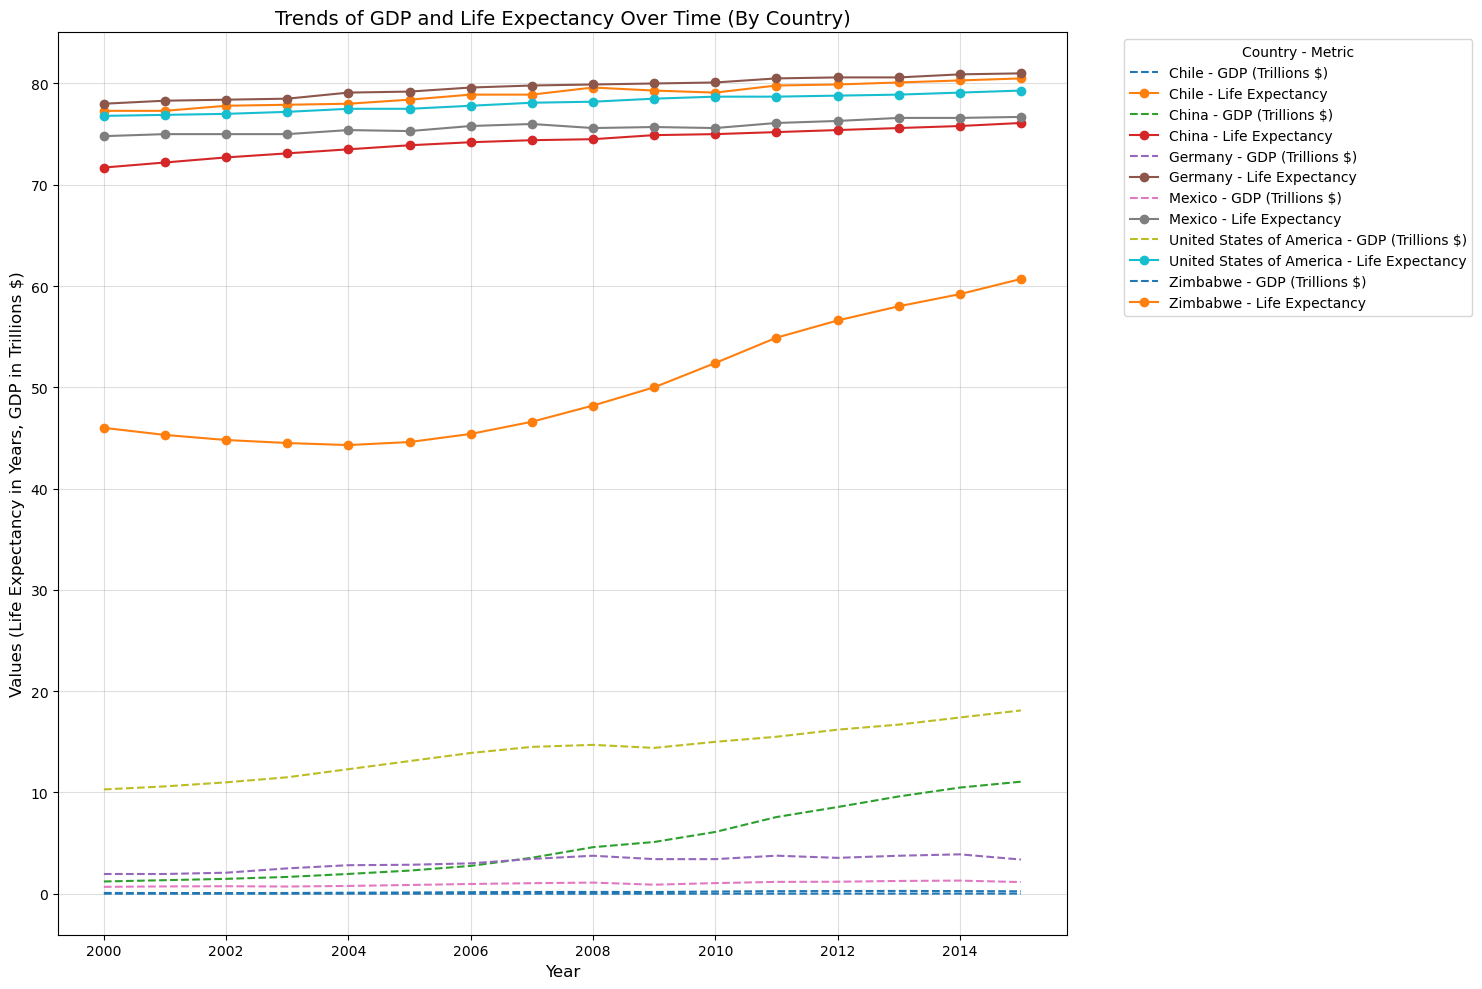

In [109]:
# Trend Analysis: PLot GDP and LIfe Expectancy over time for each country
countries = gdp_le_data['country'].unique()

plt.figure(figsize=(15, 10))

# Plotting trends for each country
for country in countries:
    country_data = gdp_le_data[gdp_le_data['country'] == country]
    plt.plot(country_data['year'], country_data['gdp'] / 1e12, linestyle='--', label=f'{country} - GDP (Trillions $)')
    plt.plot(country_data['year'], country_data['life_expectancy_at_birth_years'], marker='o', label=f"{country} - Life Expectancy")

plt.title("Trends of GDP and Life Expectancy Over Time (By Country)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Values (Life Expectancy in Years, GDP in Trillions $)", fontsize=12)
plt.legend(title="Country - Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.4)
plt.tight_layout()

### Trend Analysis:
1. General Trends
    * Life Expectancy: There is an upward trend in life expectancy over time in all countries, though the rate of increase varies.
    * GDP: GDP trends vary significantly, with some countries experiencing steady growth ( e.g., USA, China) and others showing fluctuations (e.e.; Zimabawe).
2. Country-Specific Insights:
    * Zimbabwe: Notable improvements in life expectancy over time despite lower GDP levels compared to other countries.
    * United States: Consistent high GDP growth aligns with a gradual increase in life expectancy.
    * China: Significant GDP growth correlates with a steady rise in life expectancy.
3. Scalability of GDP:
    * GDP is scaled down for visualization (in trillions of dollars), but it clearly shows varying levels of economic growth across countries.

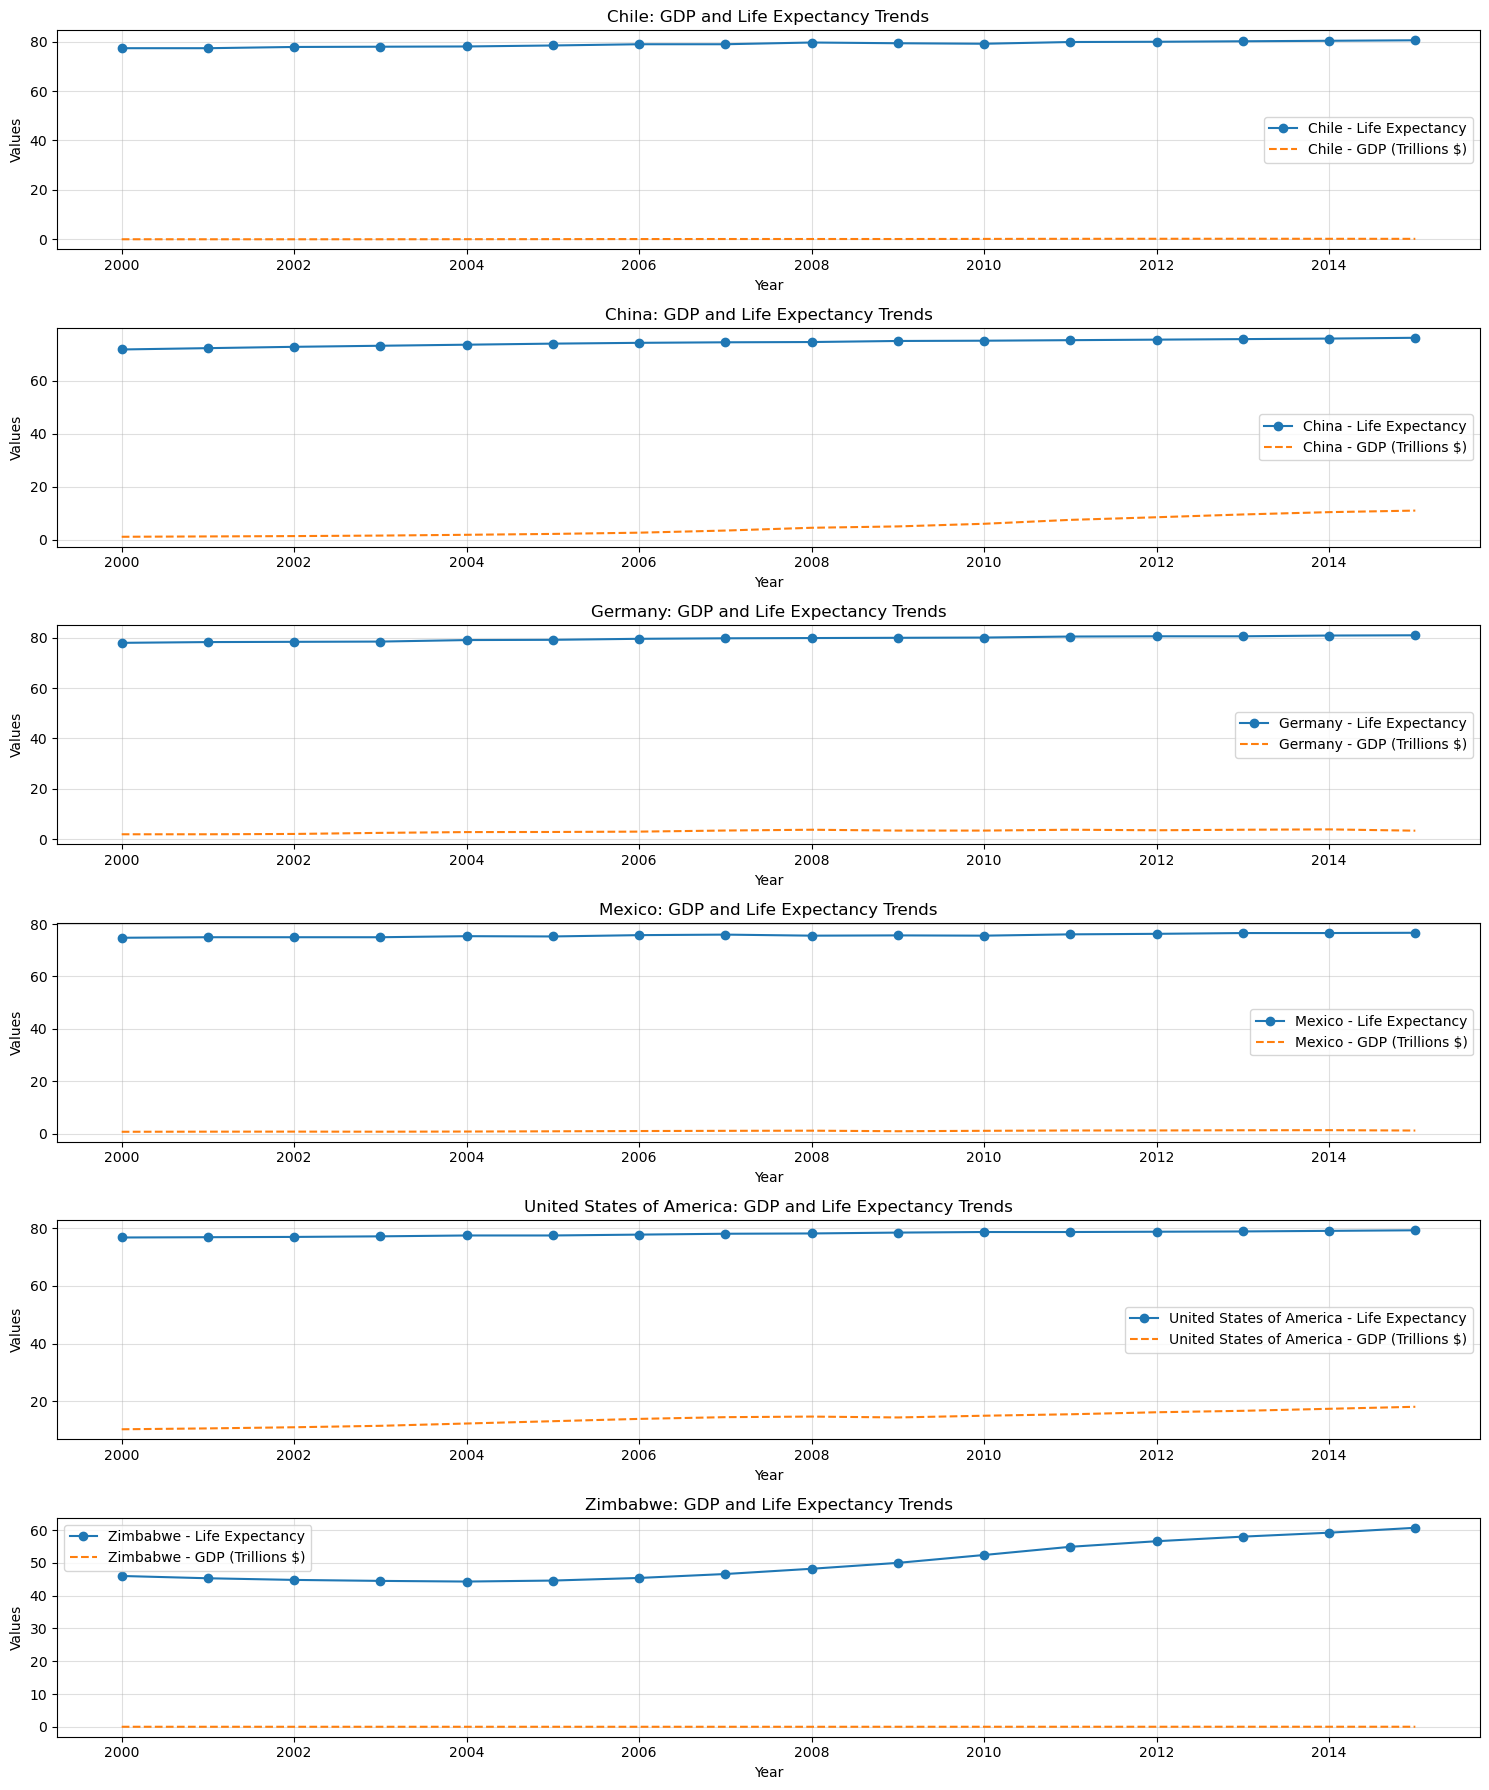

In [112]:
# Further trend analysis: Seperate plots for deeper insights by country
countries = gdp_le_data['country'].unique()

plt.figure(figsize=(15,18))

for i, country in enumerate(countries, 1):
    country_data = gdp_le_data[gdp_le_data['country'] == country]

    plt.subplot(len(countries), 1, i)
    plt.plot(country_data['year'], country_data['life_expectancy_at_birth_years'], marker='o', label=f'{country} - Life Expectancy')
    plt.plot(country_data['year'], country_data['gdp'] / 1e12, linestyle='--', label=f'{country} - GDP (Trillions $)')
    plt.title(f'{country}: GDP and Life Expectancy Trends', fontsize=12)
    plt.xlabel('Year', fontsize=10)
    plt.ylabel('Values', fontsize=10)
    plt.legend()
    plt.grid(alpha=0.4)

plt.tight_layout()
plt.show()

### Country-Specific Analysis:
1. Chile:
    * GDP: Displays steady growth over the years, indicating consistent economic development.
    * Life Expectancy: Slight upwards trend, stabilizing at higher levels, reflecting a developed healthcare system.
    * Observation: The increase in life expectancy correlates with economic growth, though the rate of change diminishes over time.
2. China:
    * GDP: Significant exponential growth, particularly after 2005, showcasing rapid industrialization and modernization.
    * Life Expectancy: Shows a gradual upward trend, mirroring GDP growth, with a small lag.
    * Observation: Rapid GDP growth strongly correlates with an increase in life expectancy, theough the improvements in life expectancy may not be as steep as GDP growth.
3. Germany:
    * GDP: Steady growth with minor fluctuations, reflecting a stable and mature economy.
    * Life Expectancy: High and stable, with incremental improvements over time.
    * Observation: Life expectancy is already at a high baseline, showing diminishing returns in health improvements despite GDP growth.
4. Mexico:
    * GDP: Consistent growth over time, albeit at a slower rate compared to other countries like China.
    * Life Expectancy: Gradual increase, reflecting consistent improvements in healthcare and living conditions.
    * Observation: Correlation between GDP and life expectancy is evident, with life expectancy improving steadily alongside economic growth.
5. United States:
    * GDP: High and continuously increasing, showing economic dominance.
    * Life Expectancy: Gradual improvement but stabalizes at a high level.
    * Observation: Despite high GDP, life expectancy increases at a slower rate, suggesting that other factors (e.g., healthcare accessibility, lifestyle) may play a role.
6. Zimbabwe:
    * GDP: Fluctuating, with periods of decline and recovery, reflecting economic instability.
    * Life Expectancy: Initially low, showing signifcant improvement over time, liekly due to global health interventions and recovery from health crisis.
    * Observation: A strong correlation between economic recovery and improved life expectancy, though external factors like health programs may play a larger role.

### General Observations:
1. Positive Correlation:
    * All Countries exhibit a positive correlation between GDP and life expectancy, though strength varies.
2. Diminishing Returns:
    * Developed Countries (e.g., Germany, USA) show smaller life expectancy gains relative to GDP growth, likely due to already high baselines.
3. Rapid Growth:
    * Countries undergoing rapid economic transformation (e.g., China, Zimababwe) show more significant life expectancy improvements.